# Estimation of Pi Using Monte Carlo

## Abstract
Over the past several thousand years, since ancient times, the number $\pi$ has been a source of mystery and wonder. Beginning with the number 3 alone, mathematicians have gradually strung trillions of digits behind it using a vast variety of methods, worked out by hand until the past few decades. One method, Monte Carlo, uses random numbers to build an estimation. In this paper, the coding language of Python served as a platform to write a program utilizing this method in order to approximate a value of $\pi$. 

## Background
For nearly 4000 years, the value of $\pi$ has been searched for and sought after by mathematicians from around the world. The Babylonians and Egyptians created the first sparks in attempting to estimate the number, most likely by measuring the length of the diameter and circumference of a circle. The value of $\pi$=3 was most common for hundreds of years, although one recovered tablet recorded 3.125. One Egyptian in particular, Ahmes, wrote on the famed Rhind Papyrus in about 1650 BC his method of using the square of a fraction of the diameter to find the value 3.1605 (*A Brief History of Pi*).

In the verse 1 Kings 7:23, when King Solomon built a large basin of cleansing water for the temple in around 960 BC, it is implied that $\pi$=3. Interestingly, however, upon a deeper investigation, a more precise approximation can be found. In the Hebrew language, every word has a numerical value, calculated by the sum of its letter. The word “line” in the 1 Kings verse is *Kuf Vov Heh* in the original language; however, *Heh* is an extra letter, not needed and not pronounced. With and without *Heh*, the value of the Hebrew word is 111 and 106, respectively, and coincidentally enough, $\pi$/3 equals 111/106 and $\pi$’s value is solved to be 3.1415094. This value was the most accurate of its time and remained so for the next few hundred years (Wilson 2000). 

When the Greeks entered the world scene, they used the method of translating a circle into a polygon with an increasing number of sides and then calculating the polygon’s area. The more sides, the more accurate the estimation. In about 250 BC, one Greek, Archimedes of Syracuse, used a similar method to conclude that $\pi$ lay between 3.14286 and 3.14085. Over the next several hundred years, different mathematicians from around Eurasia used this polygon method, increasing the number of sides to thousands, then hundreds of thousands, finally going into the millions and finding more and more accurate values with an increasing number of digits. In the early 1600s, one German named Ludolph Van Geulen used 500 million sides to discover $\pi$ to 35 correct digits. That same century, mathematicians began developing infinite series to derive $\pi$, using variations of fractions and arctan. In 1706, one man named John Machin created a formula that eventually went on to produce 707 accurate decimal places. (Wilson 2000). 

Then came the 20th century, and computers arrived with it, making $\pi$ calculations much faster and the number of digits much longer. Mathematicians used supercomputers along with a variety of methods, and last year Emma Iwao, an employee at Google, set the record at 31.4 trillion digits (Iwao 2019). Popular methods include Ramanujan’s infinite series and Chudnovky’s formula (Cook 2011, Iwao 2019). Another is Monte Carlo, and it is the center of this paper. 

## Analysis
The Monte Carlo method was originally developed for the Manhattan Project to estimate values using random numbers when the exact value was unreachable (Williamson 2013). This is precisely what is done when the method is used to estimate $\pi$, and along with the coding language Python and Jupyter Notebook, a program was built to assist in doing so. To start, we have a quarter circle with an area of $ A_c=\frac{2\pi r}{4} $. Containing it is a square with an area of $ A_s=2r $. For the purpose of simplicity, both the circle and the square have an *r* value equal to 1, and the ratio $ \frac{A_c}{A_s}=\frac{\pi}{4} $. The Monte Carlo method produces an *n* amount of random coordinates within the square, counting the number of points within the circle ($N_c$) and the number within the square ($N_s$). The ratio of these two numbers correlates to the ratio of the areas, and thus we can say that $ \pi=4\times(\frac{N_c}{N_s})$. The code below will estimate a value for $\pi$ through this method. 

In [116]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit
import time
from scipy import optimize

log_10=[]
expo=[]
t_time=[]
n_value=[]

for m in range(1, 10):
    start=time.time()                            #starts timer for run
    n=10**m                                      #determines number of random points
    inside=np.where((np.random.uniform(0, 1, n))**2 + (np.random.uniform(0, 1, n))**2 <= 1)[0]
                                                 #number of random coordinate points that are within... 
                                                 #...quarter circle are determined
    pi_calc=4*(len(inside)/n)                    #estimated value of pi is calculated...
    print(pi_calc)                               #...and then printed
    log=np.log10(abs((pi_calc/math.pi)-1))       #error from true value is calculated
    log_10.append(log)                           #error is added to list
    expo.append(m)                               #m value is added to list
    end=time.time()                              #ends timer for run
    total_time=end-start                         #total time for run is calculated
    log_time=np.log10(total_time)                #log of time is calculated for graph
    t_time.append(log_time)                      #time is added to list
    log_n=np.log10(n)                            #log of n is calculated for graph
    n_value.append(log_n)                        #n value is added to list
    
del expo[0]                                      #first value from each list is deleted 
del log_10[0]                                    #due to instrumental error
del t_time[0]
del n_value[0]

3.6
3.32
3.148
3.1324
3.13508
3.141464
3.1417488
3.14170396
3.141579672


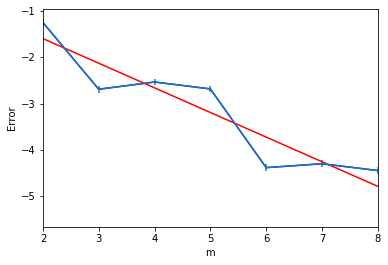

slope: -0.5331 +/- 0.0711
y-intercept: -0.5278 +/- 0.4237
Value at m=9 prediction: -5.3258


In [146]:
#m vs error graph is plotted:
plt.plot(expo, log_10, color='blue') 
plt.xlabel('m')
plt.ylabel('Error')
plt.xlim(2, 8)
#line best fit:
plt.plot(np.unique(expo), np.poly1d(np.polyfit(expo, log_10, 1))(np.unique(expo)), color='red') 
#error bars for slope error:
plt.errorbar(expo, log_10, yerr=np.math.sqrt(V[0][0])) 
plt.show()
#prints value for slope, intercept, their errors, and prediction for m=9:
print("slope: {} +/- {}".format(round(p[0], 4), round(np.math.sqrt(V[0][0]), 4)))
print("y-intercept: {} +/- {}".format(round(p[1], 4), round(np.math.sqrt(V[1][1]), 4)))
print("Value at m=9 prediction: {}".format(round(p[0]*9+p[1], 4)))

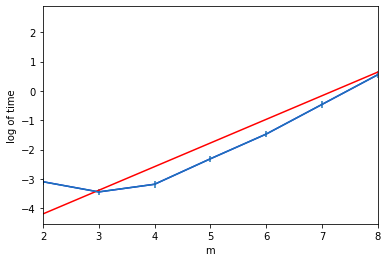

slope: 0.8058 +/- 0.1123
y-intercept: -5.8044 +/- 0.6692
Value at m=9 prediction: 1.4482


In [136]:
#log of m vs log of time graph is plotted:
plt.plot(n_value, t_time, color='blue') 
plt.xlabel('m')
plt.ylabel('log of time')
plt.xlim(2, 8)
#line best fit:
plt.plot(np.unique(n_value), np.poly1d(np.polyfit(n_value, t_time, 1))(np.unique(n_value)), color='red') 
#error bars for slope error:
plt.errorbar(n_value, t_time, yerr=np.math.sqrt(V[0][0]))
plt.show()
#prints value for slope, intercept, their errors, and prediction for m=9:
print("slope: {} +/- {}".format(round(p[0], 4), round(np.math.sqrt(V[0][0]), 4)))
print("y-intercept: {} +/- {}".format(round(p[1], 4), round(np.math.sqrt(V[1][1]), 4)))
print("Value at m=9 prediction: {}".format(round(p[0]*9+p[1], 4)))

As you can see from the code, the computer will run through an *m* amount of loops, each generating $ 10^m $ number of random points within a 1 by 1 square. The number of points within a circle with a radius of 1 is counted and then used to solve for the value of $ \pi $ using the equation presented above. The value of $ \pi $ for each run through the loop is displayed underneath the first section of code. The error for each loop is calculated in the form $ \ln (\frac{\pi_c}{\pi_t}-1) $, where $\pi_c$ is the calculated value of $\pi$ and $\pi_t$ is its true value, and then plotted in the first graph. Clearly, the error with each run becomes smaller and smaller, as the more negative the y-axis value, the smalled the error. A line-best-fit is also added for the purpose of making future predictions with a greater number of loops. Furthermore, the time for each loop to be executed is recorded and plotted in the second graph in log-log form. As revealed in the trend, with each loop the amount of time increases; if you run the first set of code, you can easily notice that the last few values take some time to pop up after the computer instantaneously calculates the first few. If we were to extend the first graph's line-best-fit to $ m=9 $, we would expect the error value to be $ error=(slope*m+intercept) $. We can also do the same with the second graph. The results are listed below. 

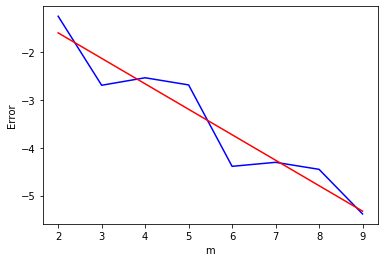

slope: -0.5331 +/- 0.0711
y-intercept: -0.5278 +/- 0.4237
Actual value at m=9 prediction: -5.3838


In [148]:
plt.plot(expo, log_10, color='blue') 
plt.xlabel('m')
plt.ylabel('Error')
plt.plot(np.unique(expo), np.poly1d(np.polyfit(expo, log_10, 1))(np.unique(expo)), color='red')
plt.show()
print("slope: {} +/- {}".format(round(p[0], 4), round(np.math.sqrt(V[0][0]), 4)))
print("y-intercept: {} +/- {}".format(round(p[1], 4), round(np.math.sqrt(V[1][1]), 4)))
print("Actual value at m=9 prediction: {}".format(round(log_10[7], 4))) 

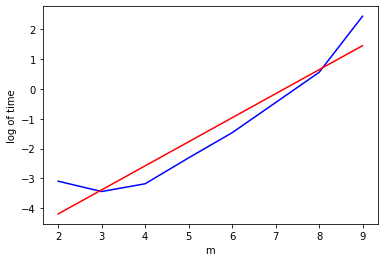

slope: -0.5331 +/- 0.0711
y-intercept: -0.5278 +/- 0.4237
Actual value at m=9 prediction: 2.4346


In [147]:
plt.plot(n_value, t_time, color='blue') 
plt.xlabel('m')
plt.ylabel('log of time')
plt.plot(np.unique(n_value), np.poly1d(np.polyfit(n_value, t_time, 1))(np.unique(n_value)), color='red')
plt.show() ##fit line within limits....
print("slope: {} +/- {}".format(round(p[0], 4), round(np.math.sqrt(V[0][0]), 4)))
print("y-intercept: {} +/- {}".format(round(p[1], 4), round(np.math.sqrt(V[1][1]), 4)))
print("Actual value at m=9 prediction: {}".format(round(t_time[7], 4))) ##change for blue line

## Conclusion
Unfortunately, the true and complete value of $\pi$ will never be calculated, as mathematicians have determined that the number of digits after the decimal is infinite. Why the pursuit? After all, only 39 digits are needed to calculate the circumference of the known universe with an accuracy of one hydrogen atom. The reason is in search of any pattern that could be found to distinguish $\pi$ from a truly irrational number. Mathematicians wish to be able to read a random million digits of the number and say with confidence that they belong to $\pi$ just as a historian can read a random page of a book and say that it belongs to a particular author (Wilson 2000). However, that search has only come up empty, with no leads thus far. 

## References
*A Brief History of Pi.* Exploratorium, https://www.exploratorium.edu/pi/history-of-pi. 
Accessed 8 Jan. 2020. 

Cook, John D. *Algorithm Used for World Record Pi Calculations*. John D. Cook Consulting, 
2011, https://www.johndcook.com/blog/2011/03/14/algorithm-record-pi-calculation/. 
Accessed 9 Jan 2020. 

Iwao, Emma H. *Pi in the Sky: Calculating a Record-Breaking 31.4 Trillion Digits of Archimedes’ 
Constant on Google Cloud.* Google Cloud, 2019, https://cloud.google.com/blog/products/compute/calculating-31-4-trillion-digits-of-archimedes-constant-on-google-cloud. Accessed 10 Jan 2020. 

Williamson, Timothy. *Calculating Pi Using the Monte Carlo Method.* American Association of 	
Physics Teachers, 2013, https://aapt-scitation-org.www2.lib.ku.edu/doi/pdf/10.1119/1.4824938. Accessed 10 Jan 2020. 

Wilson, David. *The History of Pi.* Rutgers, 2000, https://sites.math.rutgers.edu/~cherlin/History/Papers2000/wilson.html. Accessed 8 Jan. 2020. 